In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

2.0.0


# Loading data

In [2]:
faces_data = np.load("olivetti_faces.npy")
faces_target = np.load("olivetti_faces_target.npy")

# Each image of 64 x 64 size

In [3]:
faces_data[1].shape

(64, 64)

# Example of such images

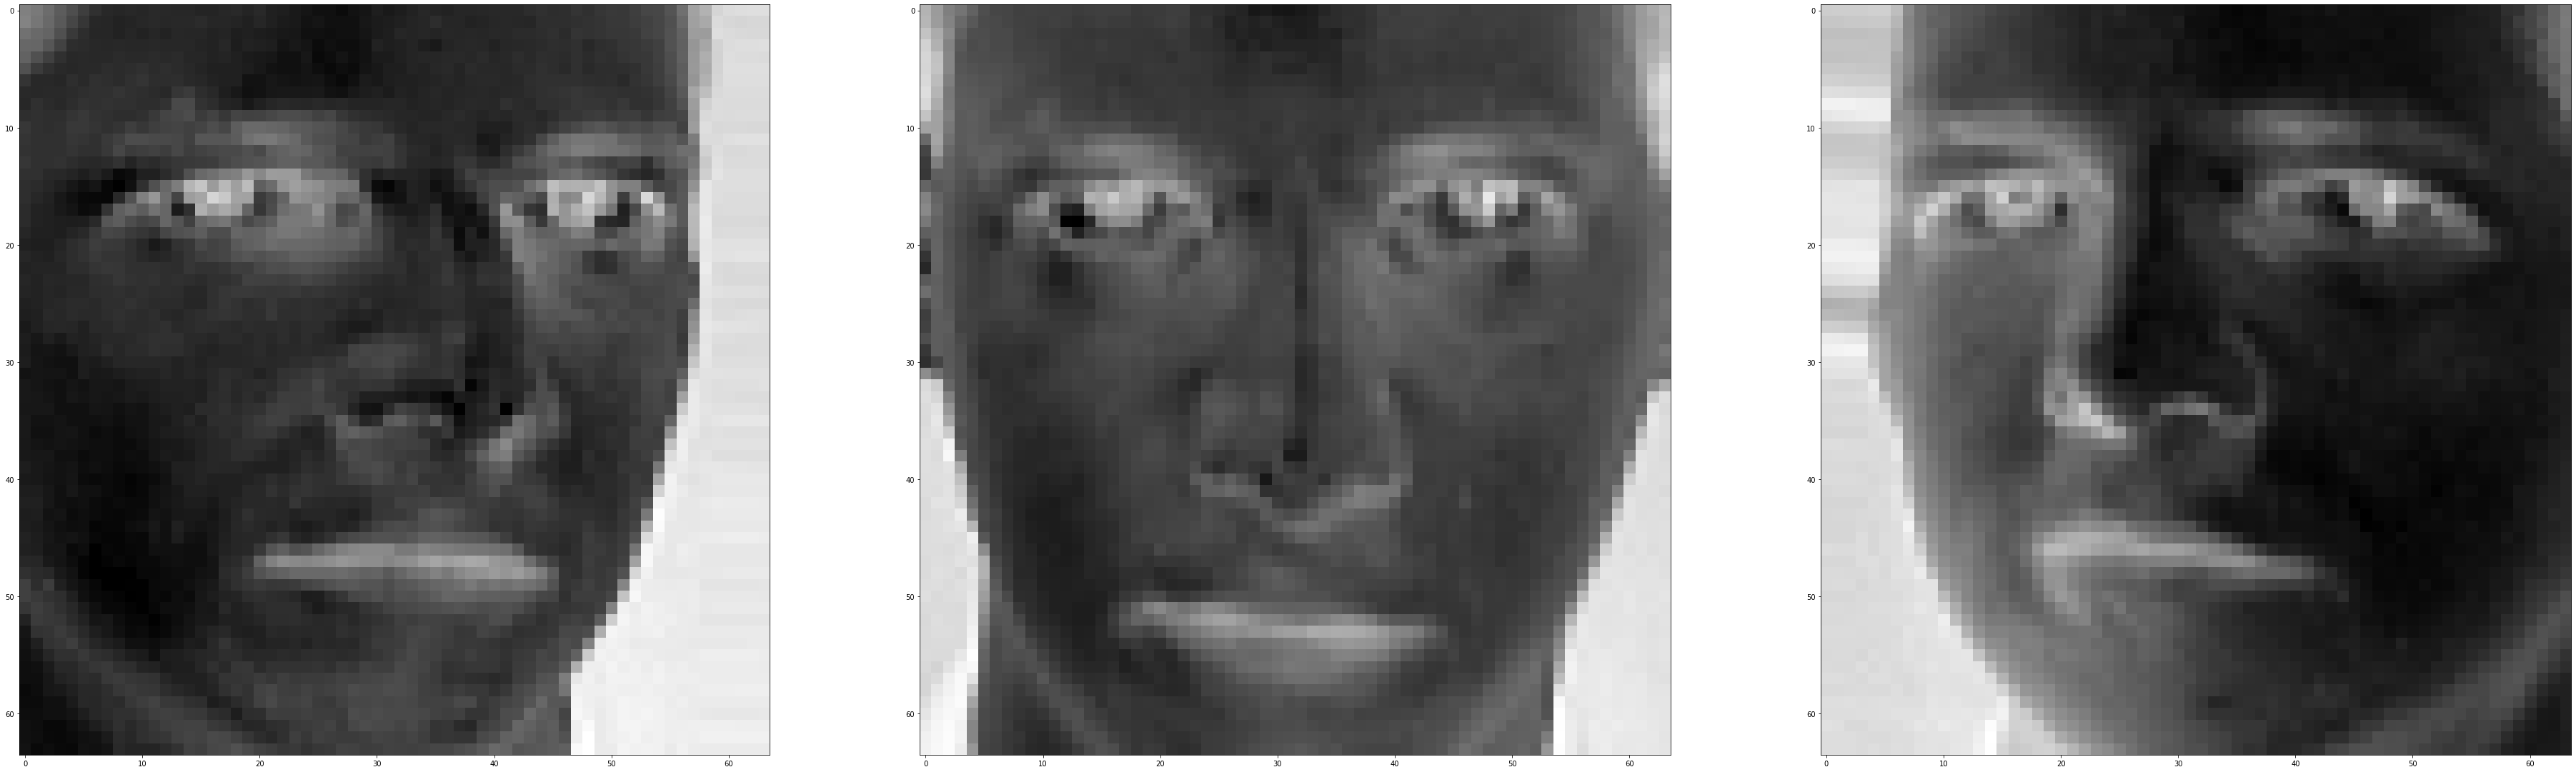

In [4]:
fig=plt.figure(figsize=(64, 64))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(faces_data[i], cmap=plt.cm.binary)
plt.show()

# Splitting data into train and test

In [9]:
face_data_train, face_data_test, face_target_train, face_target_test = train_test_split(faces_data, faces_target, test_size=0.2, random_state=42)

# Amount of unique classes

In [6]:
np.unique(face_target_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

# 1st model with 128 nodes in Dense layer

In [18]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(40, activation='softmax')
])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### As you can see, in first layer of our model, we pass (64, 64) tuple. It means that we will work with Images described by square matrix  of 64 size. Also it means that we work with black-white pictures, because it has only 2 dimensions of numbers corresponding to it. Later on I will try to work with colored pictures. Important point is that input layer should be 1 dimensional, so that our (64, 64) array will be flattened to 4096 list.

# Training 1st model with 10 epochs

In [19]:
model1.fit(face_data_train, face_target_train, epochs=10)

Train on 320 samples
Epoch 1/10
320/320 [==============================] - 0s 1ms/sample - loss: 4.2888 - accuracy: 0.0250
Epoch 2/10
320/320 [==============================] - 0s 163us/sample - loss: 3.6944 - accuracy: 0.0312
Epoch 3/10
320/320 [==============================] - 0s 156us/sample - loss: 3.6649 - accuracy: 0.0344
Epoch 4/10
320/320 [==============================] - 0s 147us/sample - loss: 3.6583 - accuracy: 0.0219
Epoch 5/10
320/320 [==============================] - 0s 153us/sample - loss: 3.6397 - accuracy: 0.0281
Epoch 6/10
320/320 [==============================] - 0s 150us/sample - loss: 3.6289 - accuracy: 0.0594
Epoch 7/10
320/320 [==============================] - 0s 150us/sample - loss: 3.6096 - accuracy: 0.0594
Epoch 8/10
320/320 [==============================] - 0s 153us/sample - loss: 3.6241 - accuracy: 0.0594
Epoch 9/10
320/320 [==============================] - 0s 144us/sample - loss: 3.6029 - accuracy: 0.0625
Epoch 10/10
320/320 [========================

# Accessing accuracy on the test set

In [20]:
test_loss, test_acc = model1.evaluate(face_data_test,  face_target_test, verbose=2)

print('\nTest accuracy:', test_acc2)

80/1 - 0s - loss: 3.6445 - accuracy: 0.0125

Test accuracy: 0.0625


# Training 1st model with 100 epochs

In [21]:
model1.fit(face_data_train, face_target_train, epochs=100)

Train on 320 samples
Epoch 1/100
320/320 [==============================] - 0s 225us/sample - loss: 3.5730 - accuracy: 0.0906
Epoch 2/100
320/320 [==============================] - 0s 191us/sample - loss: 3.5365 - accuracy: 0.0656
Epoch 3/100
320/320 [==============================] - 0s 206us/sample - loss: 3.5126 - accuracy: 0.0906
Epoch 4/100
320/320 [==============================] - 0s 194us/sample - loss: 3.4858 - accuracy: 0.0875
Epoch 5/100
320/320 [==============================] - 0s 184us/sample - loss: 3.4781 - accuracy: 0.0844
Epoch 6/100
320/320 [==============================] - 0s 184us/sample - loss: 3.4462 - accuracy: 0.0844
Epoch 7/100
320/320 [==============================] - 0s 188us/sample - loss: 3.4227 - accuracy: 0.1000
Epoch 8/100
320/320 [==============================] - 0s 188us/sample - loss: 3.4013 - accuracy: 0.0906
Epoch 9/100
320/320 [==============================] - 0s 191us/sample - loss: 3.3669 - accuracy: 0.0875
Epoch 10/100
320/320 [============

In [23]:
test_loss1, test_acc1 = model1.evaluate(face_data_test,  face_target_test, verbose=2)

print('\nTest accuracy:', test_acc1)

80/1 - 0s - loss: 2.2665 - accuracy: 0.1875

Test accuracy: 0.1875


#  2nd model with 1024 nodes in dense layer

In [30]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(40, activation='softmax')
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training 2nd model with 10 epochs

In [25]:
model2.fit(face_data_train, face_target_train, epochs=10)

Train on 320 samples
Epoch 1/10
320/320 [==============================] - 1s 2ms/sample - loss: 6.8867 - accuracy: 0.0094
Epoch 2/10
320/320 [==============================] - 0s 791us/sample - loss: 4.6848 - accuracy: 0.0344
Epoch 3/10
320/320 [==============================] - 0s 797us/sample - loss: 3.8623 - accuracy: 0.0531
Epoch 4/10
320/320 [==============================] - 0s 841us/sample - loss: 3.4378 - accuracy: 0.1219
Epoch 5/10
320/320 [==============================] - 0s 809us/sample - loss: 3.2525 - accuracy: 0.1531
Epoch 6/10
320/320 [==============================] - 0s 813us/sample - loss: 3.0898 - accuracy: 0.2406
Epoch 7/10
320/320 [==============================] - 0s 797us/sample - loss: 2.9446 - accuracy: 0.3375
Epoch 8/10
320/320 [==============================] - 0s 847us/sample - loss: 2.7502 - accuracy: 0.4219
Epoch 9/10
320/320 [==============================] - 0s 859us/sample - loss: 2.5734 - accuracy: 0.4406
Epoch 10/10
320/320 [========================

# Accessing accuracy on the test set for 2nd model and 10 epochs

In [26]:
test_loss2, test_acc2 = model2.evaluate(face_data_test,  face_target_test, verbose=2)

print('\nTest accuracy:', test_acc2)

80/1 - 0s - loss: 2.4067 - accuracy: 0.4000

Test accuracy: 0.4


# Training 2nd model with 100 epochs

In [28]:
model2.fit(face_data_train, face_target_train, epochs=100)

Train on 320 samples
Epoch 1/100
320/320 [==============================] - 1s 2ms/sample - loss: 7.2446 - accuracy: 0.0250
Epoch 2/100
320/320 [==============================] - 0s 819us/sample - loss: 4.8751 - accuracy: 0.0375
Epoch 3/100
320/320 [==============================] - 0s 825us/sample - loss: 3.8610 - accuracy: 0.0844
Epoch 4/100
320/320 [==============================] - 0s 850us/sample - loss: 3.4803 - accuracy: 0.1125
Epoch 5/100
320/320 [==============================] - 0s 856us/sample - loss: 3.2952 - accuracy: 0.1969
Epoch 6/100
320/320 [==============================] - 0s 884us/sample - loss: 3.1383 - accuracy: 0.2344
Epoch 7/100
320/320 [==============================] - 0s 828us/sample - loss: 2.9786 - accuracy: 0.3125
Epoch 8/100
320/320 [==============================] - 0s 844us/sample - loss: 2.8640 - accuracy: 0.3281
Epoch 9/100
320/320 [==============================] - 0s 828us/sample - loss: 2.6439 - accuracy: 0.4344
Epoch 10/100
320/320 [==============

## We can see that after more or less 45th epoch model has already 100% accuracy for our dataset. I think after that point of time it starts getting overfited, so lets try to restrict our model with 40 epochs

# Accessing accuracy on the test set

In [29]:
test_loss3, test_acc3 = model2.evaluate(face_data_test,  face_target_test, verbose=2)

print('\nTest accuracy:', test_acc3)

80/1 - 0s - loss: 0.2405 - accuracy: 0.9250

Test accuracy: 0.925


# Training 2nd model with 40 epochs

In [31]:
model2.fit(face_data_train, face_target_train, epochs=40)

Train on 320 samples
Epoch 1/40
320/320 [==============================] - 1s 2ms/sample - loss: 7.6138 - accuracy: 0.0281
Epoch 2/40
320/320 [==============================] - 0s 813us/sample - loss: 4.3549 - accuracy: 0.0562
Epoch 3/40
320/320 [==============================] - 0s 831us/sample - loss: 3.6592 - accuracy: 0.0812
Epoch 4/40
320/320 [==============================] - 0s 822us/sample - loss: 3.4125 - accuracy: 0.1219
Epoch 5/40
320/320 [==============================] - ETA: 0s - loss: 3.2198 - accuracy: 0.15 - 0s 809us/sample - loss: 3.2205 - accuracy: 0.1656
Epoch 6/40
320/320 [==============================] - 0s 850us/sample - loss: 3.0709 - accuracy: 0.3094
Epoch 7/40
320/320 [==============================] - 0s 825us/sample - loss: 2.9369 - accuracy: 0.2906
Epoch 8/40
320/320 [==============================] - 0s 847us/sample - loss: 2.7447 - accuracy: 0.3812
Epoch 9/40
320/320 [==============================] - 0s 859us/sample - loss: 2.6293 - accuracy: 0.4594
Epo

# Accessing accuracy on the test set

In [32]:
test_loss4, test_acc4 = model2.evaluate(face_data_test,  face_target_test, verbose=2)

print('\nTest accuracy:', test_acc4)

80/1 - 0s - loss: 0.5722 - accuracy: 0.8625

Test accuracy: 0.8625


### Well, actually accuracy decreased at about 5-6%, but we got time gain at leas more than twice. Later on I will this model for face classification.

# Now lets make predictions
### Obviously I will use 2nd model, that has 1024 Layers. To prevent questions, I just randomly picked 1024, because it is the closest to 1000 number of power 2.

In [33]:
predictions_face = model2.predict(face_data_test)

## Let's check one of our predictions and compare it to real target value

In [35]:
print("prediction for 1st test picture ", np.argmax(predictions_face[0]))
print("actual value ", face_target_test[0])

prediction for 1st test picture  20
actual value  20


## Here are some functions to output pretty pictures with results

In [36]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(40))
    plt.yticks([])
    thisplot = plt.bar(range(40), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Here you can see some pictures, their predicted value, their actual value, and other very probable values

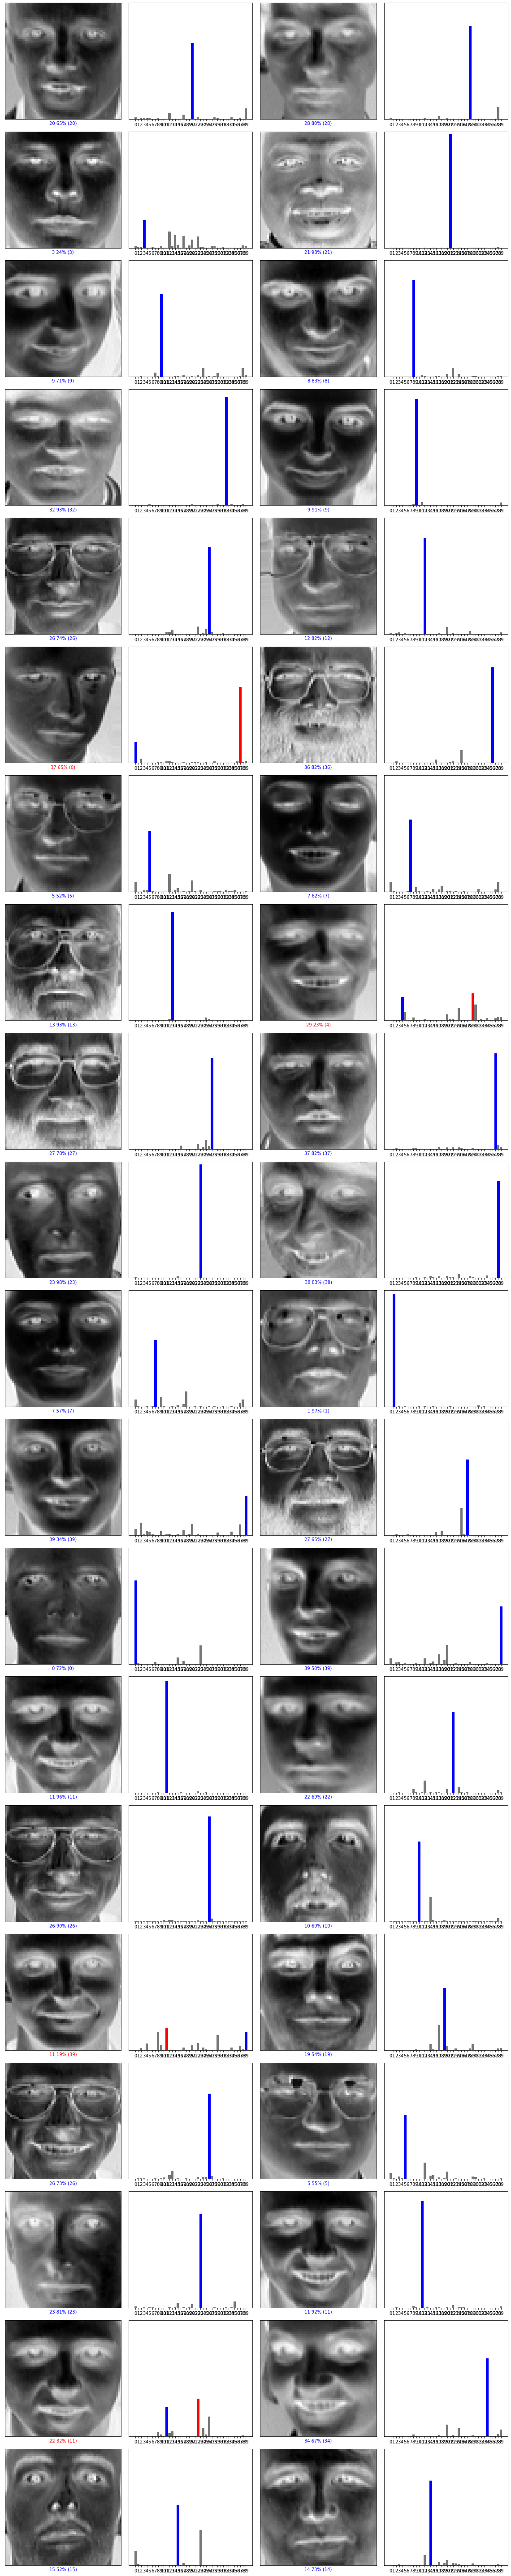

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 20
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols*2, 2*num_rows*2))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_face[i], face_target_test, face_data_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_face[i], face_target_test)
plt.tight_layout()
plt.show()

In [4]:
plt.imshow(face_data_test[10], cmap=plt.cm.binary)
plt.show()
print("Actual ", face_target_test[10])
print("Predicted ", np.argmax(predictions_face[10]))

NameError: name 'face_data_test' is not defined